In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df_artists = pd.read_csv('artists.csv')
df_tracks = pd.read_csv('tracks.csv')
df_Features = pd.read_csv('SpotifyFeatures.csv')

In [ ]:
#-----Analyzing data
#Tracks first 5 values
df_tracks.head()

In [ ]:
#Df information
df_tracks.info()

In [ ]:
#Descriptive Statistics
df_tracks.describe().transpose()
df_tracks.describe(include = 'object').transpose()

In [ ]:
#Check For Null Values
pd.isnull(df_tracks).sum()

In [ ]:
#Rows in df where name is null
df_tracks[df_tracks['name'].isnull()]

In [ ]:
#Top Tracks
top_tracks_df = df_tracks.query('popularity>95', inplace = False).sort_values('popularity', ascending = False)
top_tracks_df[:10]

In [ ]:
#Top Tracks
top_tracks_df = df_tracks.query('popularity>95', inplace = False).sort_values('popularity', ascending = False)
top_tracks_df[:10]

In [ ]:
#Least popular tracks
least_popular_df = df_tracks.sort_values('popularity', ascending = True)
least_popular_df.head(10)

In [ ]:
#Least popular tracks
least_popular_df = df_tracks.query('popularity<1', inplace = False).sort_values('popularity').head(10)
least_popular_df

In [ ]:
#Convert index to relaese date instead
df_tracks.set_index('release_date', inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)

In [30]:
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
1922,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
df_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 18, dtype: object

In [ ]:
#List of artists where the track names are null
df_tracks[['artists']][df_tracks['name'].isnull()]

In [8]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [95]:
#Convert Duration in ms to just Seconds. 
df_tracks['duration(s)'] = df_tracks['duration_ms'].apply(lambda x: round(x/1000))

In [97]:
#drop created column duration and ms version of duration
df_tracks.drop(['duration_ms'], inplace = True, axis = 1)

In [32]:
#Graphing key findings
#Correlation Data Frame
corr_df = df_tracks.drop(['key', 'mode', 'explicit',], axis = 1).corr(numeric_only= True, method = 'pearson')
corr_df

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration(s)
popularity,1.000000,0.187000,0.302315,0.327028,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759,0.027683
danceability,0.187000,1.000000,0.241563,0.251436,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196,-0.120368
energy,0.302315,0.241563,1.000000,0.764735,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983,0.024828
loudness,0.327028,0.251436,0.764735,1.000000,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377,0.000345
speechiness,-0.047357,0.199310,-0.053506,-0.167112,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171,-0.125770
acousticness,-0.370882,-0.242951,-0.715412,-0.519423,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927,-0.064435
instrumentalness,-0.236487,-0.225900,-0.195839,-0.329306,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257,0.069271
liveness,-0.048740,-0.106168,0.124632,0.029529,0.207047,-0.004738,-0.038848,1.000000,-0.000034,-0.014912,-0.024202,0.002138
valence,0.004643,0.528150,0.372276,0.275448,0.046501,-0.180939,-0.175226,-0.000034,1.000000,0.135250,0.105529,-0.163200
tempo,0.071364,-0.040783,0.230099,0.189288,-0.086911,-0.195235,-0.055477,-0.014912,0.135250,1.000000,0.031875,-0.001210


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration(s)')]

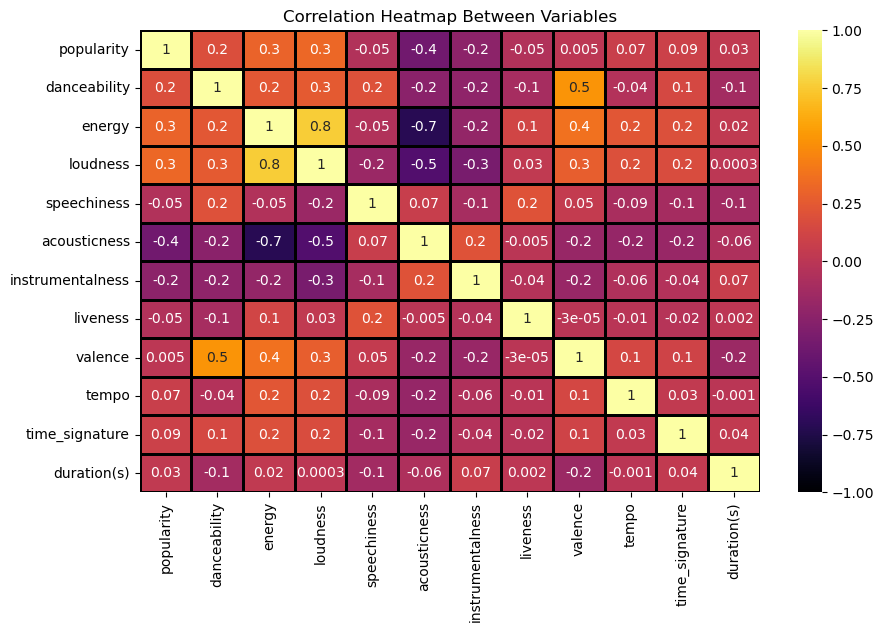

In [61]:
#Correlation Heat Map
plt.figure(figsize=(10,6))
heatmap = sb.heatmap(corr_df, annot= True, fmt= ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths=1, linecolor="Black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90) 
plt.show()

In [67]:
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))
print(len(sample_df)) # Number of records in the sample
print(len(df_tracks)) #Number of records in the original df

2346
586672


[Text(0.5, 1.0, 'Loudness vs Energy')]

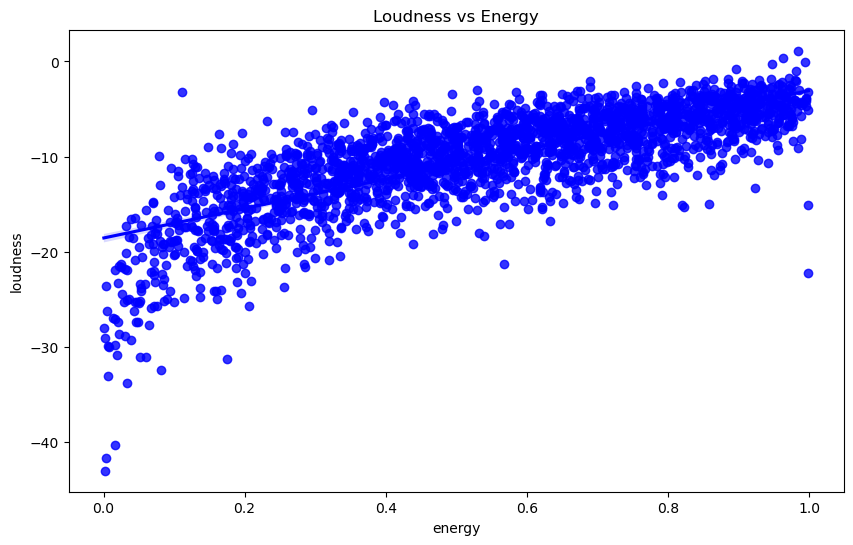

In [76]:
#Regression plot between loudness and energy
plt.figure(figsize=(10,6))
sb.regplot(data = sample_df, y = "loudness", x = "energy", color = "b").set(title = "Loudness vs Energy")

[Text(0.5, 1.0, 'Popularity vs Acousticness')]

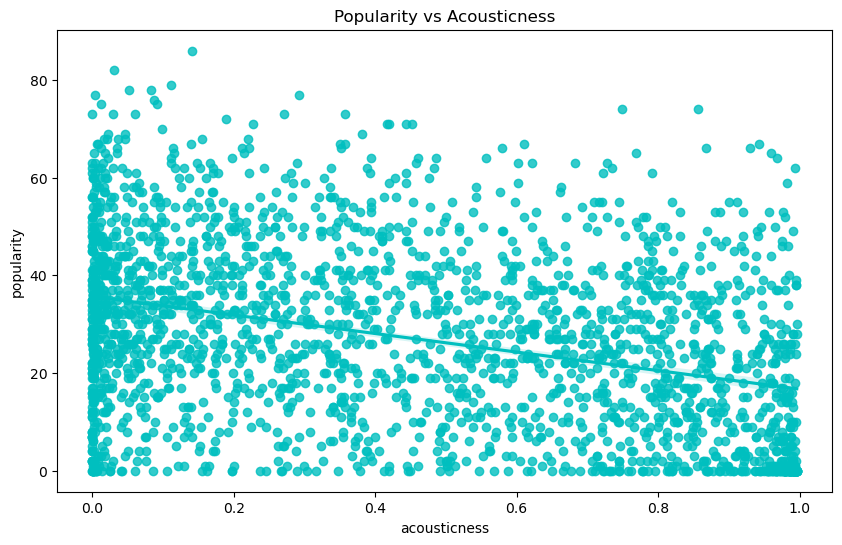

In [80]:
#Regression plot between Popularity and Acousticness
plt.figure(figsize=(10,6))
sb.regplot(data = sample_df, y = "popularity", x = "acousticness", color = "c").set(title = "Popularity vs Acousticness")

In [ ]:
df_tracks.set_index('release_date', inplace = True)
df_tracks

In [21]:
df_tracks.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [22]:
df_tracks['dates']=df_tracks.index.get_level_values('release_date')
df_tracks.dates = pd.to_datetime(df_tracks.dates, errors='coerce')

In [89]:
#For dates that resulted in 'NaT' values, default month and day to 01-01 and use release date index as year
df_tracks["dates"] = df_tracks.apply(lambda x: pd.to_datetime(x.name+'-'+'01'+'-'+'01') if (x['dates'] is pd.NaT) else x['dates'], axis = 1)

In [92]:
years = df_tracks.dates.dt.year

/Users/mayes2/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


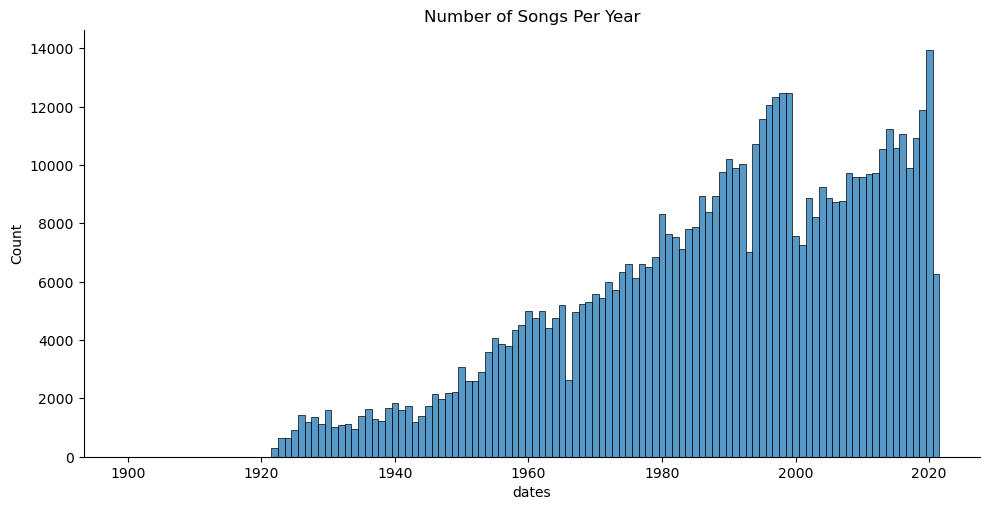

In [94]:
#Plot the number of songs per year
sb.displot(years, discrete = True, aspect = 2, height = 5, kind = "hist").set(title = "Number of Songs Per Year")

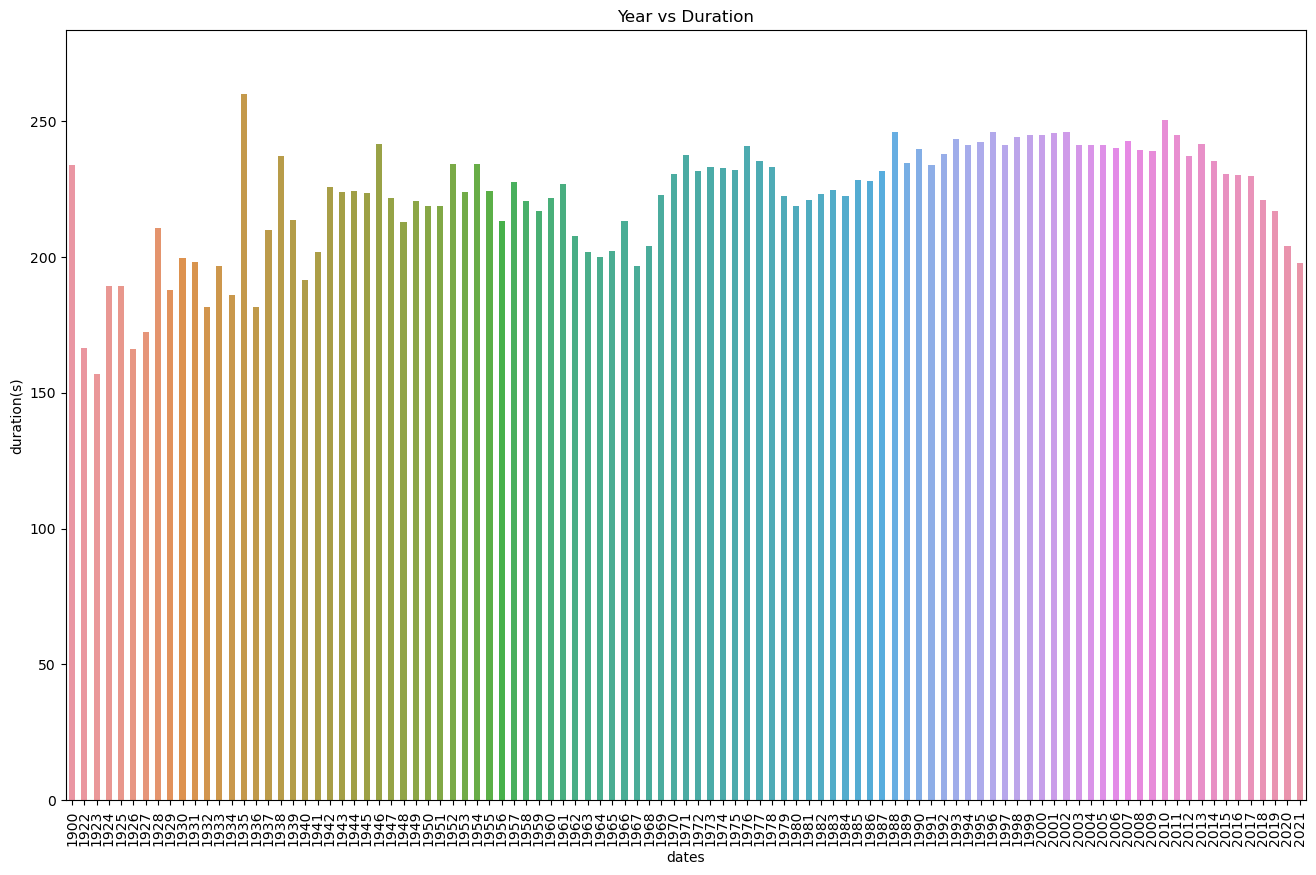

In [107]:
total_dr = df_tracks['duration(s)']
fig_dims = (16,10)
fig, ax = plt.subplots(figsize = fig_dims)
fgi = sb.barplot(x = years, y = total_dr, ax = ax, errwidth = False, width =.5).set(title = "Year vs Duration")
plt.xticks(rotation = 90)
plt.show()

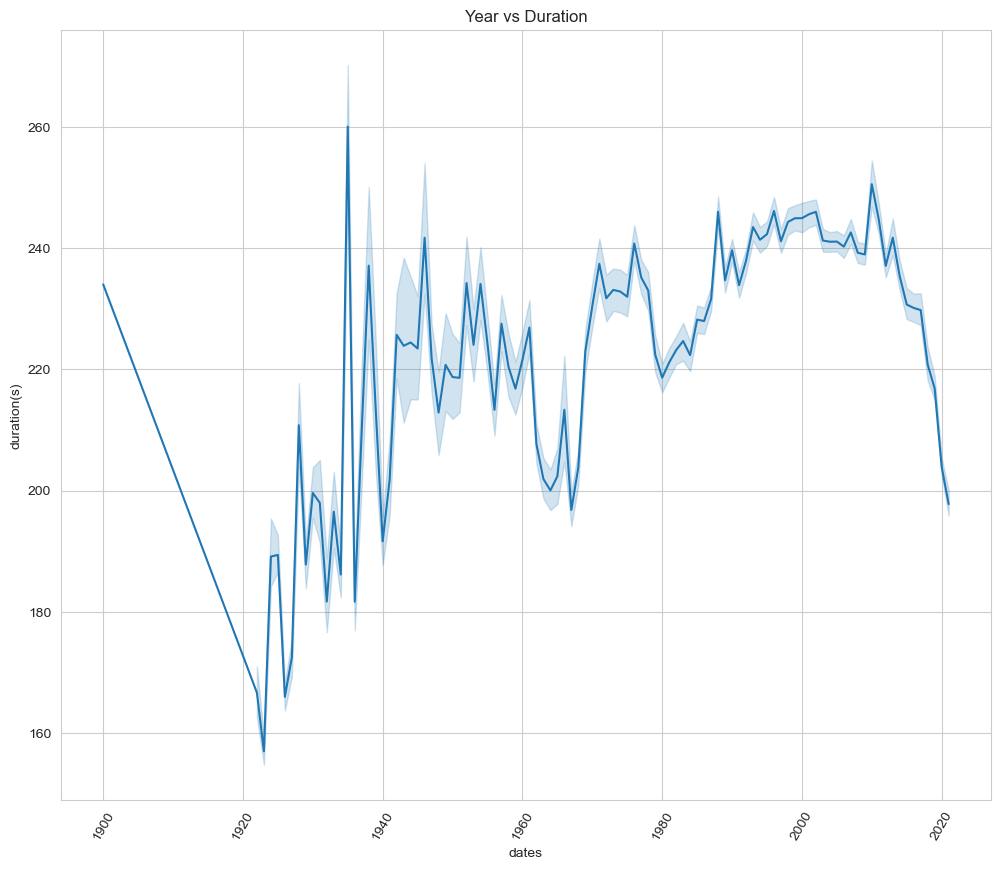

In [113]:
#Line Plot for adverage duration over the years
sb.set_style(style = 'whitegrid')
fig_dims = (12,10)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sb.lineplot(x = years, y = total_dr, ax = ax).set(title = "Year vs Duration")
plt.xticks(rotation = 60)
plt.show()

In [116]:
df_genre = pd.read_csv('SpotifyFeatures.csv')
df_genre.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


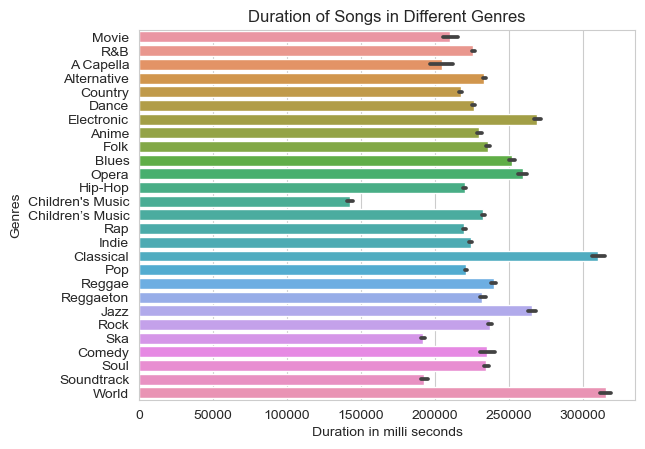

<Figure size 1400x1000 with 0 Axes>

In [120]:
#Bar Plot of duration of songs
plt.title("Duration of Songs in Different Genres")
sb.color_palette("rocket", as_cmap = True)
sb.barplot(y = 'genre', x = 'duration_ms', data = df_genre)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")
plt.figure(figsize=(14,10))
plt.show()

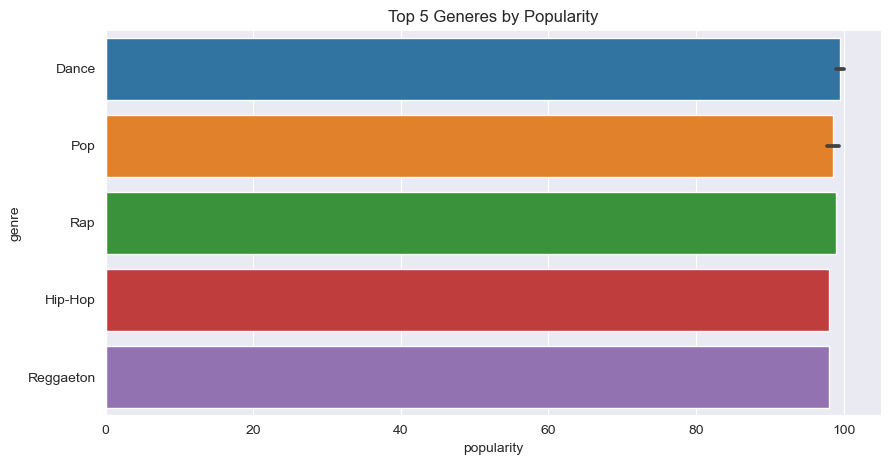

In [123]:
#Top 5 genres based on popularity
sb.set_style(style = "darkgrid")
plt.figure(figsize=(10,5))
famous = df_genre.sort_values("popularity", ascending = False).head(10) #need 10 values due to repetative genres
sb.barplot(y = 'genre', x = 'popularity', data = famous).set(title = "Top 5 Generes by Popularity")
plt.show()